In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import deepxde as dde
import tensorflow as tf
R = 0.1
L= 1
t_last=1

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('Hydrostatic Data with Nodes.xlsx')  # Replace with your file path

# Sample n points randomly from the DataFrame
n = 100  # Specify how many points you want to sample
sampled_data = df.sample(n=n)

# Split the data into training (60%) and testing (40%)
train_data, test_data = train_test_split(sampled_data, test_size=0.4, random_state=42)

# Training data
x_train = np.array(train_data['x'].values).reshape(-1, 1)  # Extract the x values for training
y_train = np.array(train_data['y'].values).reshape(-1, 1)   # Extract the y values for training
sigma_train =np.array(train_data['sigma'].values).reshape(-1, 1)  # Extract the sigma values for training

# Testing data
x_test = np.array(test_data['x'].values).reshape(-1, 1)  # Extract the x values for testing
y_test = np.array(test_data['y'].values).reshape(-1, 1)  # Extract the y values for testing
sigma_test = np.array(test_data['sigma'].values).reshape(-1, 1) # Extract the sigma values for testing

print(x_train)
print(y_train)
print(sigma_train)
Com=np.stack((x_train,y_train))
com=Com.T
print(com)


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
[[0.0013969 ]
 [0.01061844]
 [0.01762974]
 [0.01661916]
 [0.033799  ]
 [0.02268263]
 [0.00222502]
 [0.03480958]
 [0.03278842]
 [0.02874611]
 [0.05097884]
 [0.00104271]
 [0.01146986]
 [0.00241522]
 [0.00420034]
 [0.04895768]
 [0.01864032]
 [0.04188363]
 [0.04087305]
 [0.00105511]
 [0.04289421]
 [0.05198942]
 [0.00536754]
 [0.00516571]
 [0.00730576]
 [0.03683074]
 [0.04996826]
 [0.00437817]
 [0.0056655 ]
 [0.02470379]
 [0.01864032]
 [0.014598  ]
 [0.03986248]
 [0.01762974]
 [0.04188363]
 [0.0039568 ]
 [0.00625629]
 [0.00416902]
 [0.00235559]
 [0.03582016]
 [0.00578846]
 [0.00405447]
 [0.014598  ]
 [0.00330798]
 [0.00413668]
 [0.00422553]
 [0.053     ]
 [0.04087305]
 [0.00012539]
 [0.03177784]
 [0.02874611]
 [0.0014367 ]
 [0.00078503]
 [0.00227149]
 [0.04592595]
 [0.00378664]
 [0.053     ]
 [0.00255101]
 [0.02773553]
 [0.03784132]]
[[0.00388666]
 [0.00098525]
 [0.004032  ]
 [0.0400487 ]
 [0.006048  ]
 [0

In [3]:
data_x=np.column_stack((x_train,y_train))
data_x=data_x
print(data_x.shape)
data_sigma=np.array(sigma_train)
test_x=np.column_stack((x_test,y_test))
test_x=test_x
print(test_x.shape)
test_sigma=np.array(sigma_test)

from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the training and testing data
scaler_x = StandardScaler()
scaler_s = StandardScaler()

data_x = scaler_x.fit_transform(data_x)
data_sigma=scaler_s.fit_transform(data_sigma)
test_x = scaler_x.transform(test_x)
test_sigma=scaler_s.transform(test_sigma)

print(data_x)
print(data_sigma)
data = dde.data.dataset.DataSet(X_train=data_x, y_train=data_sigma, X_test=test_x, y_test=test_sigma)

(60, 2)
(40, 2)
[[-1.06478574 -0.81080812]
 [-0.54084031 -0.9636996 ]
 [-0.14247567 -0.80314947]
 [-0.19989425  1.09476698]
 [ 0.77622251 -0.69691542]
 [ 0.14461757 -0.59068136]
 [-1.01773405 -0.72576585]
 [ 0.83364109  0.83193106]
 [ 0.71880393  0.98963261]
 [ 0.48912938  1.93584154]
 [ 1.75233927  0.93706542]
 [-1.08490972  1.09476698]
 [-0.49246493  1.51530426]
 [-1.00692743 -0.84759651]
 [-0.90550091 -0.90861245]
 [ 1.63750189  1.67300562]
 [-0.08505698  1.46273708]
 [ 1.23557159 -0.69691542]
 [ 1.17815301  0.14855805]
 [-1.08420558 -0.62808252]
 [ 1.29299018  2.0935431 ]
 [ 1.80975785 -0.16684487]
 [-0.83918374 -0.87605321]
 [-0.85065103 -0.69731809]
 [-0.7290587  -0.58286868]
 [ 0.94847847 -0.80314947]
 [ 1.69492068  1.62043863]
 [-0.89539701 -1.00920434]
 [-0.82225441 -0.88314638]
 [ 0.25945484  1.88327436]
 [-0.08505698 -0.96250054]
 [-0.31473147  0.46396105]
 [ 1.12073443  1.09476698]
 [-0.14247567  0.25369242]
 [ 1.23557159 -0.37821326]
 [-0.9193383  -0.93296623]
 [-0.7886873

Compiling model...
Building feed-forward neural network...

'build' took 0.189829 s



c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'compile' took 0.388001 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.20e+00]    [1.30e+00]    []  
1000      [9.12e-01]    [1.02e+00]    []  
2000      [1.37e-01]    [4.36e-01]    []  
3000      [1.14e-01]    [3.39e-01]    []  
4000      [7.46e-02]    [1.52e-01]    []  
5000      [3.05e-03]    [3.99e-02]    []  
6000      [1.08e-03]    [2.12e-02]    []  
7000      [5.14e-04]    [1.19e-02]    []  
8000      [2.94e-04]    [7.00e-03]    []  
9000      [1.70e-04]    [4.43e-03]    []  
10000     [9.17e-05]    [2.98e-03]    []  
11000     [4.66e-05]    [2.25e-03]    []  
12000     [2.66e-05]    [1.89e-03]    []  
13000     [1.77e-05]    [1.72e-03]    []  
14000     [1.31e-05]    [1.62e-03]    []  
15000     [1.02e-05]    [1.54e-03]    []  
16000     [8.23e-06]    [1.47e-03]    []  
17000     [6.71e-06]    [1.41e-03]    []  
18000     [5.67e-06]    [1.37e-03]    []  
19000     [4.89e-06]    [1.33e-03]    []  
20000     [4.24e-06]    [1.29e-03]    []  


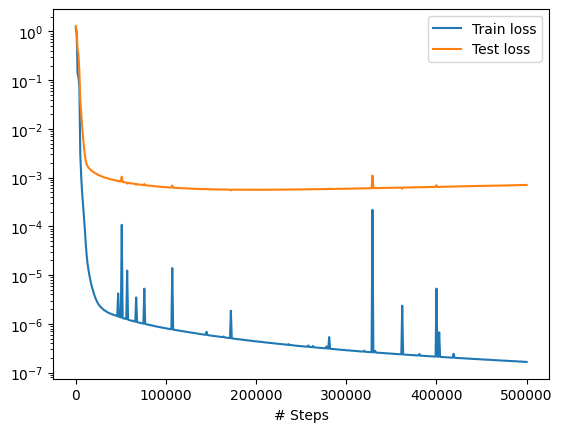

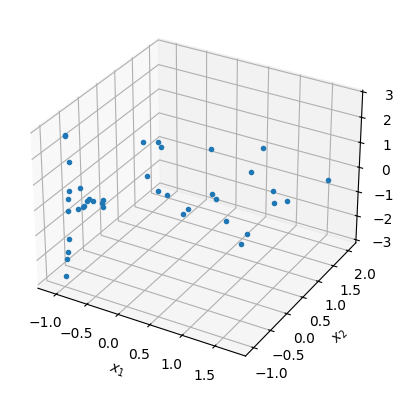

In [4]:


# Define the network for σ
layer_size = [2] + [50] * 10 + [1]  # 2 inputs (x, y ) -> hidden layers -> 1 output (σ)
activation = "tanh"
initializer = "Glorot uniform"
net_sigma = dde.nn.FNN(layer_size, activation,initializer)

# Define the model
model_sigma = dde.Model(data, net_sigma)

# Compile the model with data
model_sigma.compile("adam", lr=1e-5)

# Train the model
losshistory, train_state = model_sigma.train(epochs=500000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [231]:
Vdata=np.array([[0.008341715,0.030073043]])
Vdata=scaler_x.transform(Vdata)
verify=model_sigma.predict(Vdata)
# Convert predictions back to original scale
predictions_original_scale = scaler_s.inverse_transform(verify)

# Print the predictions in the original scale
print(predictions_original_scale)


[[42621804.]]


In [5]:

X=df.iloc[:,1]
print(X)
X=np.array(X.tolist()).reshape(-1,1)

Y=df.iloc[:,2]
Y=np.array(Y.tolist()).reshape(-1,1)
print(Y)
Cor=np.column_stack([X,Y])
print(Cor)
Cor=scaler_x.transform(Cor)

0       0.014598
1       0.014598
2       0.014598
3       0.014598
4       0.014598
          ...   
3996    0.001037
3997    0.001158
3998    0.001352
3999    0.001268
4000    0.002116
Name: x, Length: 4001, dtype: float64
[[0.014112  ]
 [0.01610713]
 [0.01810226]
 ...
 [0.0049515 ]
 [0.00508507]
 [0.00575253]]
[[0.014598   0.014112  ]
 [0.014598   0.01610713]
 [0.014598   0.01810226]
 ...
 [0.0013522  0.0049515 ]
 [0.00126786 0.00508507]
 [0.00211575 0.00575253]]


Mean Absolute Percentage Error: 23.89%
R² Score: 1.00


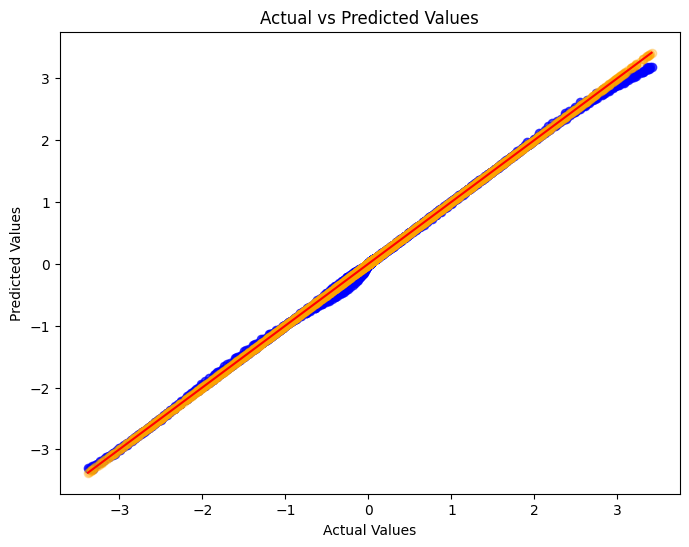

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Assuming `model_sigma` is your trained model
# `X_test` is your test input data and `y_test` is the actual test output data

# Get predictions on test data
S_p = model_sigma.predict(Cor)
S_t=df.iloc[:,3]
#print(S_t)
S_t=np.array(S_t.tolist()).reshape(-1,1)
S_t=scaler_s.transform(S_t)
#print("First few actual values:", S_t[:5])
#print("First few predicted values:", S_p[:5])
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(S_t, S_p) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

# Calculate R² Score
r2 = r2_score(S_t, S_p)
print(f"R² Score: {r2:.2f}")

# Plot the actual vs predicted values for test data
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(S_t, S_p, alpha=0.7, color='blue', label='Predicted Values')
# Scatter plot for testing data (Actual Values)
plt.scatter(S_t, S_t, alpha=0.3, color='orange', label='Actual Values')
plt.plot([min(S_t), max(S_t)], [min(S_t), max(S_t)], color='red')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [21]:
def pde_C_L(x, C_L):
    dC_L_dt = dde.grad.jacobian(C_L, x, i=0, j=2)
    dC_L_dx2 = dde.grad.hessian(C_L, x, i=0, j=0)
    dC_L_dy2 = dde.grad.hessian(C_L, x, i=0, j=1)
    eq = dC_L_dt - (1/3.8) * (dC_L_dx2 + dC_L_dy2)
    return eq

In [28]:
import numpy as np
import deepxde as dde

class RandomPointConstraintCallback(dde.callbacks.Callback):
    def __init__(self, num_pairs, model_sigma, L, t_last, model):
        self.num_pairs = num_pairs
        self.model_sigma = model_sigma
        self.L = L
        self.t_last = t_last
        self.model = model  # Attach the model to the callback

    def on_epoch_end(self):
        # Access the model from train_state
    

        constraint_loss = 0.0
        for _ in range(self.num_pairs):
            # Sample random points in the domain
            x_A, y_A = np.random.uniform(-self.L, self.L), np.random.uniform(-self.L, self.L)
            x_B, y_B = np.random.uniform(-self.L, self.L), np.random.uniform(-self.L, self.L)

            # Get sigma values for random points
            sigma_A = self.model_sigma.predict(np.array([[x_A, y_A]]))
            sigma_B = self.model_sigma.predict(np.array([[x_B, y_B]]))

            # Compute the constraint
            VH, R, T = 1.0, 1.0, 1.0  # Modify constants as needed
            exponent = (VH / (R * T)) * (sigma_A - sigma_B)

            # Get C values at the random points
            C_A = model.predict(np.array([[x_A, y_A, self.t_last]]))
            C_B = model.predict(np.array([[x_B, y_B, self.t_last]]))

            # Calculate constraint loss
            constraint_loss += np.mean((C_A - C_B * np.exp(exponent))**2)

        # Log the constraint loss
        print(f"Constraint loss after epoch: {constraint_loss / self.num_pairs}")

# Create the callback object
constraint_callback = RandomPointConstraintCallback(
    num_pairs=10,
    model_sigma=model_sigma,
    L=L,
    t_last=t_last,
    model=model
)



Compiling model...
Building feed-forward neural network...
'build' took 0.026352 s



c:\Users\yesda\Documents\GitHub\PINN_testing\.conda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.395774 s

Training model...

0         [6.10e-02, 4.00e+02]    [5.96e-02, 4.00e+02]    []  


C:\Users\yesda\AppData\Local\Temp\ipykernel_21212\1463995230.py:35: RuntimeWarning: overflow encountered in exp
  constraint_loss += np.mean((C_A - C_B * np.exp(exponent))**2)


Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: 0.14496839395724237
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf


C:\Users\yesda\AppData\Local\Temp\ipykernel_21212\1463995230.py:35: RuntimeWarning: overflow encountered in square
  constraint_loss += np.mean((C_A - C_B * np.exp(exponent))**2)


Constraint loss after epoch: 6.464144181925803
Constraint loss after epoch: 5.83938390747644
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: 19471.607799900743
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: 13.101932285074145
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf


C:\Users\yesda\AppData\Local\Temp\ipykernel_21212\1463995230.py:35: RuntimeWarning: overflow encountered in multiply
  constraint_loss += np.mean((C_A - C_B * np.exp(exponent))**2)


Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint loss after epoch: inf
Constraint

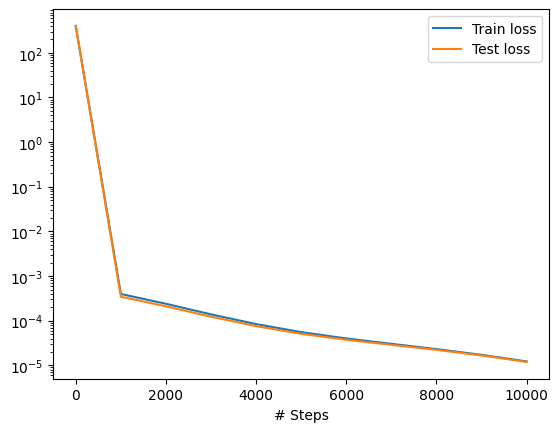

In [29]:
# Define the square domain (e.g., 2x2 square with side length L)

square = dde.geometry.Rectangle([-L, -L], [L, L])

# Define the circular hole at the center (radius R)
  # Radius of the hole
circle = dde.geometry.Disk([0, 0], R)

# Geometry and time domain
geom = dde.geometry.csg.CSGDifference(square, circle)
timedomain = dde.geometry.TimeDomain(0, t_last)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define the initial condition: C(x, y, 0) = 20
def initial_condition(x):
    return 20

# Define Dirichlet boundary conditions (e.g., C = 0 on the boundaries)
def boundary_condition(x, on_boundary):
    return on_boundary

# Create the initial and boundary conditions
ic = dde.icbc.IC(geomtime, lambda x: 20, lambda _, on_initial: on_initial)
bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, boundary_condition)

data = dde.data.TimePDE(
    geomtime,
    pde_C_L,[ic],
    num_domain=1000,
    num_boundary=150,
    num_initial=180,
    num_test=1000,
    )

# Network for C_L
layer_size = [3] + [64] * 3 + [1]  
activation = "tanh"
initializer = "Glorot uniform"
net_C_L = dde.nn.FNN(layer_size, activation, initializer)



# Define the model with the PDE, initial and boundary conditions
model= dde.Model(data, net_C_L)

# Compile the model with the custom loss function
model.compile("adam", lr=1e-3)

# Add the callback when training the model
losshistory, train_state = model.train(epochs=10000, callbacks=[constraint_callback])

# Optionally plot and save results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)